# Data Preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import sklearn
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter
from lifelines.utils import concordance_index as cindex
from sklearn.model_selection import train_test_split

In [3]:
#df
df = pd.read_csv("pbc_clean.csv")
df

,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,400,2,1,58.765229,1,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,4500,0,1,56.446270,1,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,1012,2,1,70.072553,0,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,1925,2,1,54.740589,1,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,1504,1,2,38.105407,1,0,1,1,0.0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1153,0,1,61.182752,1,0,1,0,0.0,0.4,246,3.58,24,797.0,91.00,113,288,10.4,2
272,994,0,2,58.299795,1,0,0,0,0.0,0.4,260,2.75,41,1166.0,70.00,82,231,10.8,2
273,939,0,1,62.332649,1,0,0,0,0.0,1.7,434,3.35,39,1713.0,171.00,100,234,10.2,2
274,839,0,1,37.998631,1,0,0,0,0.0,2.0,247,3.16,69,1050.0,117.00,88,335,10.5,2


https://www.mayo.edu/research/documents/pbchtml/doc-10027635

In [4]:
df["status"].value_counts()

status
0    147
2    111
1     18
Name: count, dtype: int64

In [5]:
#remove status 1
df = df[df["status"] != 1]

#convert 2 to 1
df["status"] = df["status"].replace(2,1)
df



C:\Users\fajar\AppData\Local\Temp\ipykernel_16744\1709111391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["status"] = df["status"].replace(2,1)


,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,400,1,1,58.765229,1,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,4500,0,1,56.446270,1,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,1012,1,1,70.072553,0,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,1925,1,1,54.740589,1,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
5,1832,0,2,55.534565,1,0,1,0,0.0,1.0,322,4.09,52,824.0,60.45,213,204,9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1153,0,1,61.182752,1,0,1,0,0.0,0.4,246,3.58,24,797.0,91.00,113,288,10.4,2
272,994,0,2,58.299795,1,0,0,0,0.0,0.4,260,2.75,41,1166.0,70.00,82,231,10.8,2
273,939,0,1,62.332649,1,0,0,0,0.0,1.7,434,3.35,39,1713.0,171.00,100,234,10.2,2
274,839,0,1,37.998631,1,0,0,0,0.0,2.0,247,3.16,69,1050.0,117.00,88,335,10.5,2


In [6]:
continuous_columns = ['age', # Age of the Patient
                      'bili', # Serum Bilirubin in mg/dl
                      'chol', # Serum Cholesterol in mg/dl
                      'albumin', # Albumin in gm/dl
                      'copper', # Urine Copper in ug/day
                      'alk.phos', # Alkaline Phosphatase in U/liter
                      'ast', # presence of Ascites: 0 = No 1 = Yes
                      'trig', # Triglicerides in mg/dl
                      'platelet', # Platelets per cubic ml/1000
                      'protime' # Prothrombin time in seconds
                     ]

In [7]:
df.value_counts("status")

status
0    147
1    111
Name: count, dtype: int64

# Cox Proportional Hazard + EDA 

In [8]:
# Fit the Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='status')

# Print the summary of the model
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 258 total observations, 147 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 258
number of events observed = 111
   partial log-likelihood = -463.50
         time fit was run = 2024-05-20 16:57:11 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
trt       -0.14      0.87      0.22           -0.57            0.28                0.57                1.33
age        0.02      1.02      0.01            0.00            0.05                1.00                1.05
sex       -0.38      0.68      0.31           -0.99            0.22                0.37                1.25
ascites    0.08      1.09      0.39           -0.67            0.84                0.51                2.32
hepato     0.02      1.02      0.25           -0.48            0.51                0.62                1.67
spiders    0.08      1.08      0.24           -0.40            0.56                0.67                1.75
edema      1.00      2.71      0.39            0.22            1.77                1.25                5.86
bili       0.08      1.08      0.03            0.03            0.13                1.03                1.14
chol       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
albumin   -0.72      0.49      0.31           -1.33           -0.12                0.27                0.89
copper     0.00      1.00      0.00            0.00            0.00                1.00                1.00
alk.phos  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ast        0.00      1.00      0.00            0.00            0.01                1.00                1.01
trig      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
platelet   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
protime    0.23      1.25      0.11            0.02            0.44                1.02                1.55
stage      0.47      1.60      0.18            0.12            0.82                1.13                2.27

           cmp to     z      p  -log2(p)
covariate                               
trt          0.00 -0.65   0.52      0.95
age          0.00  2.06   0.04      4.66
sex          0.00 -1.24   0.22      2.21
ascites      0.00  0.22   0.83      0.27
hepato       0.00  0.07   0.95      0.08
spiders      0.00  0.32   0.75      0.42
edema        0.00  2.53   0.01      6.46
bili         0.00  3.09 <0.005      8.94
chol         0.00  1.06   0.29      1.79
albumin      0.00 -2.34   0.02      5.71
copper       0.00  2.28   0.02      5.45
alk.phos     0.00 -0.14   0.89      0.17
ast          0.00  2.04   0.04      4.61
trig         0.00 -0.77   0.44      1.18
platelet     0.00  0.86   0.39      1.37
protime      0.00  2.13   0.03      4.90
stage        0.00  2.67   0.01      7.03
---
Concordance = 0.85
Partial AIC = 960.99
log-likelihood ratio test = 163.11 on 17 df
-log2(p) of ll-ratio test = 83.67

In [9]:
from lifelines.utils import concordance_index

# Assuming you have already fitted the CoxPHFitter model as 'cph' and have the dataframe as 'df'
ci_index = concordance_index(df['time'], -cph.predict_partial_hazard(df), df['status'])
print("Concordance Index (CI):", ci_index)


Concordance Index (CI): 0.8463235699707651



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold b

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 258 total observations, 147 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic    p  -log2(p)
age      km              0.06 0.81      0.30
         rank            0.10 0.75      0.42
albumin  km              0.04 0.83      0.26
         rank            0.22 0.64      0.65
alk.phos km              1.12 0.29      1.78
         rank            1.12 0.29      1.78
ascites  km              0.18 0.67      0.57
         rank            0.68 0.41      1.28
ast      km              0.19 0.66      0.59
         rank            0.90 0.34      1.55
bili     km              1.03 0.31      1.69
         rank            1.51 0.22      2.19
chol     km              0.06 0.80      0.32
         rank            0.42 0.51      0.96
copper   km              0.00 0.99      0.02
         rank            0.08 0.78      0.36
edema    km              2.26 0.13      2.91
         rank            2.29 0.13      2.95
hepato   km              0.52 0.47      1.08
         rank            0.51 0.48      1.07
platelet km              0.01 0.94      0.09
         rank            0.01 0.92      0.11
protime  km              2.35 0.13      2.99
         rank            3.69 0.05      4.19
sex      km              0.03 0.86      0.22
         rank            0.06 0.81      0.30
spiders  km              1.55 0.21      2.23
         rank            1.20 0.27      1.87
stage    km              1.60 0.21      2.28
         rank            1.51 0.22      2.19
trig     km              0.35 0.55      0.85
         rank            0.46 0.50      1.01
trt      km              0.11 0.74      0.43
         rank            0.24 0.63      0.68



1. Variable 'protime' failed the non-proportional test: p-value is 0.0547.

   Advice 1: the functional form of the variable 'protime' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'protime' using pd.cut, and then specify it in
`strata=['protime', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.6263)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.7414)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.7489)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.8095)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.8100)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.8572)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.4107)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.6726)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.4770)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.4726)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.2734)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.2129)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.1298)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.1328)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.2186)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.3095)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p

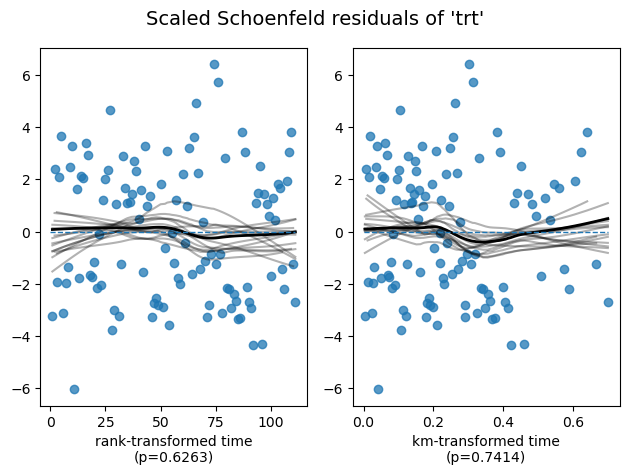

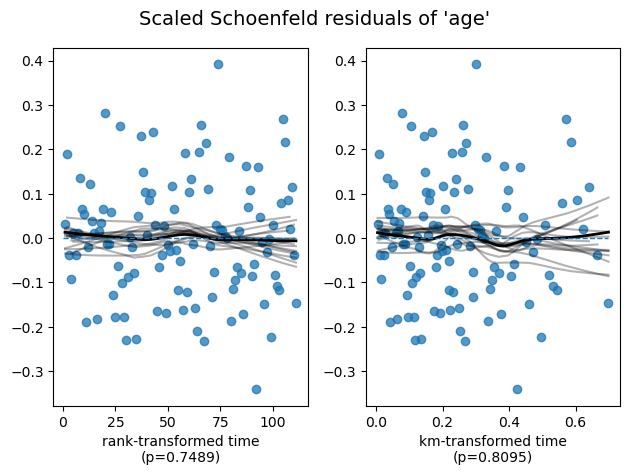

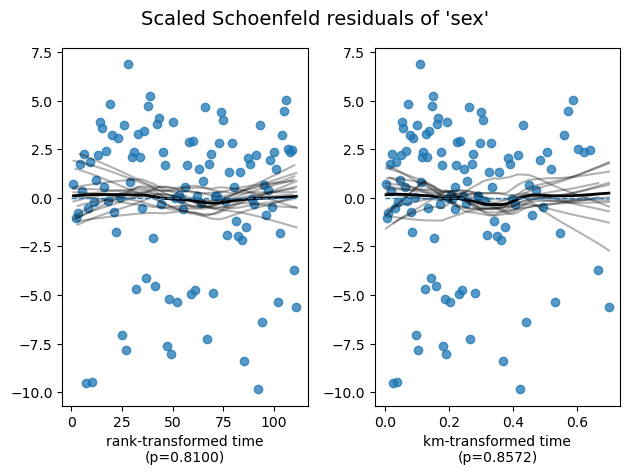

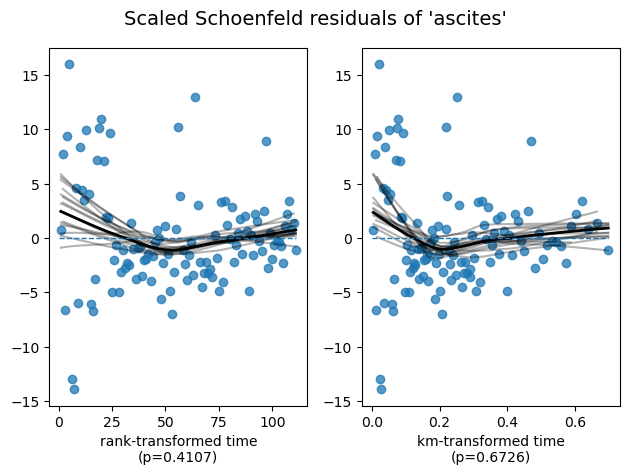

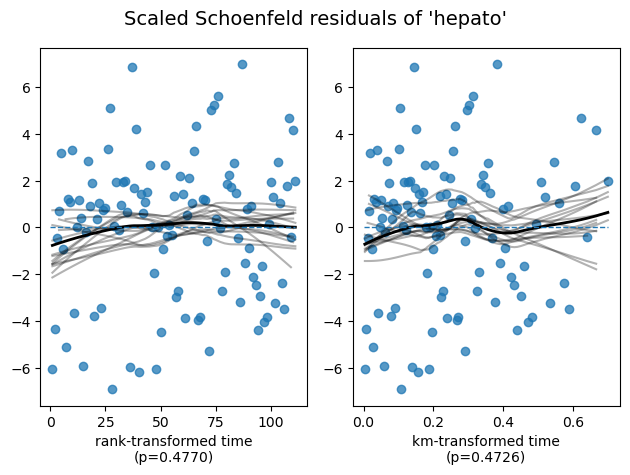

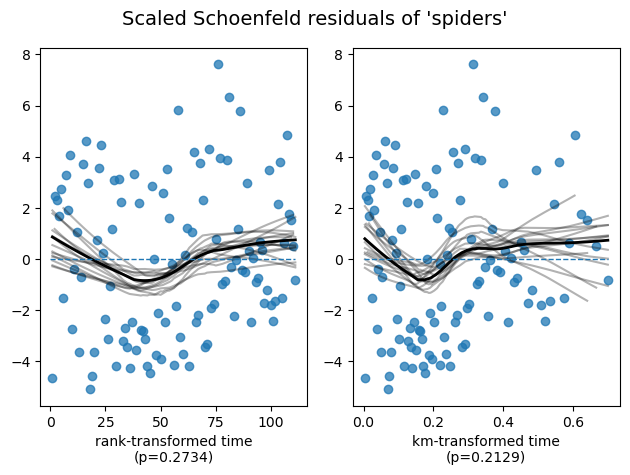

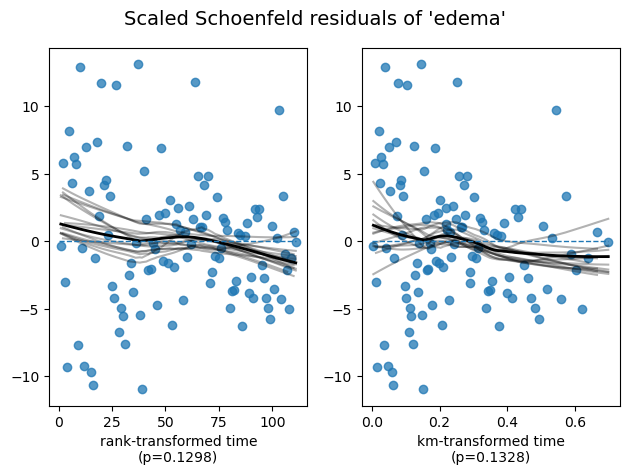

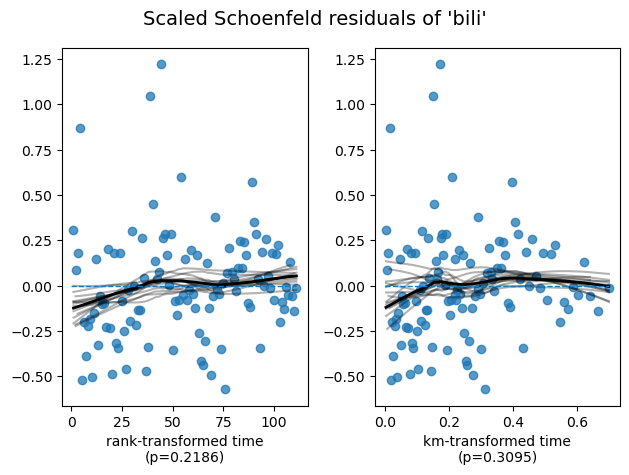

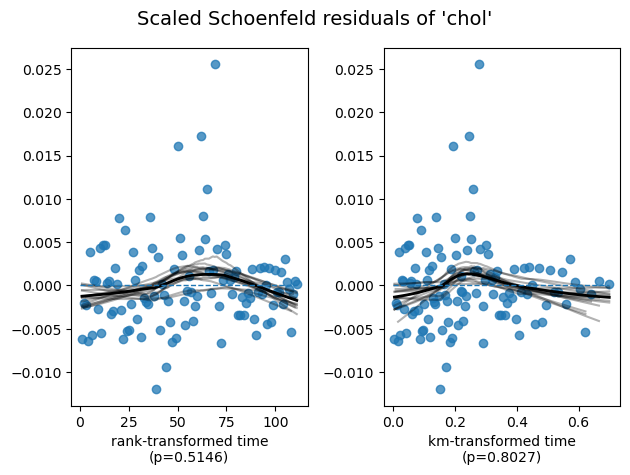

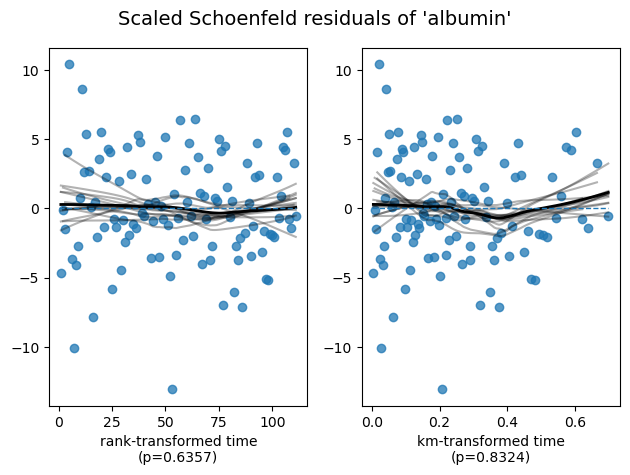

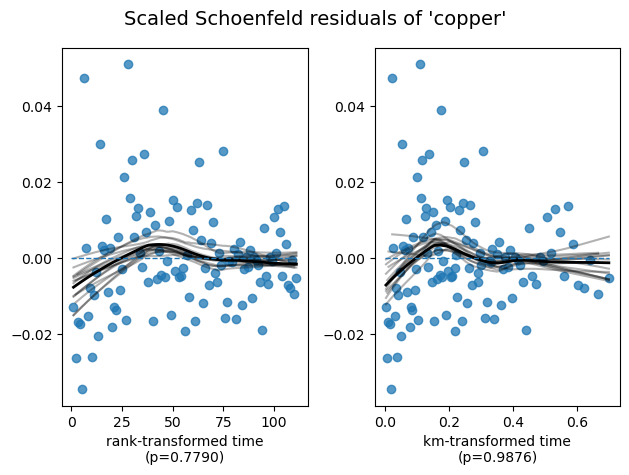

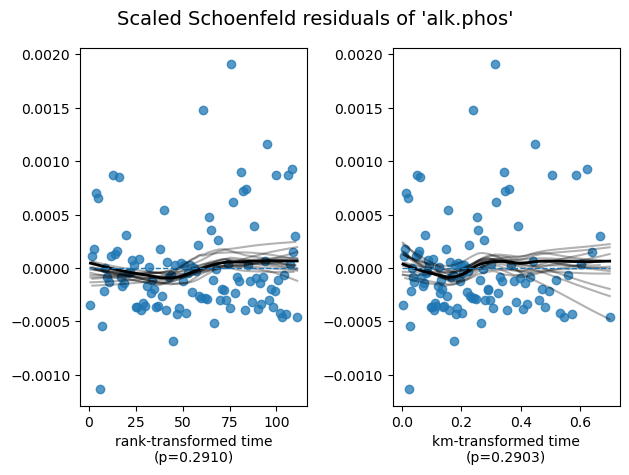

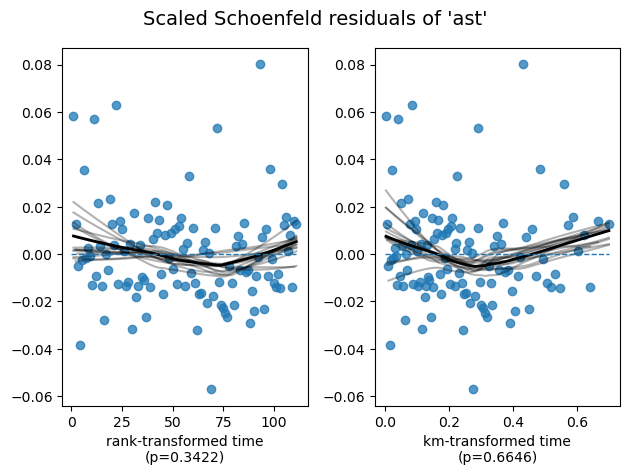

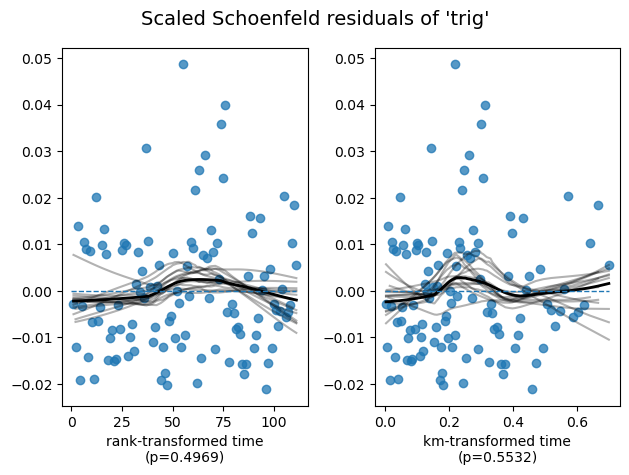

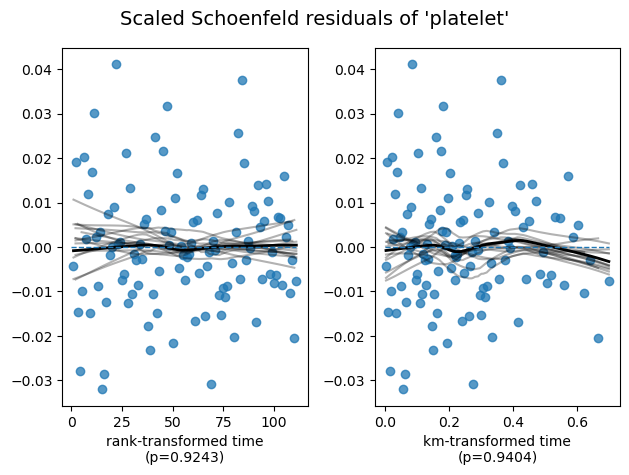

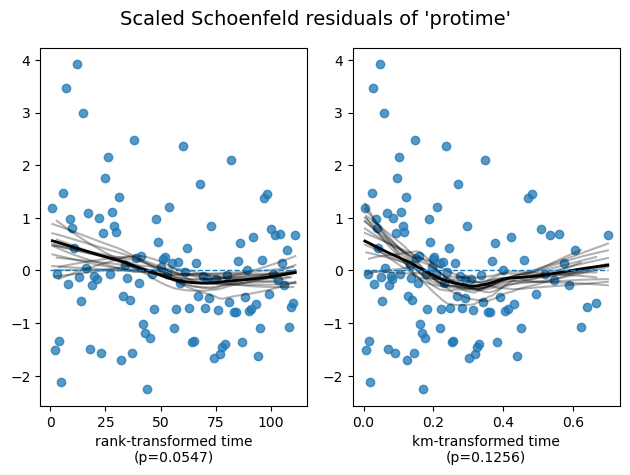

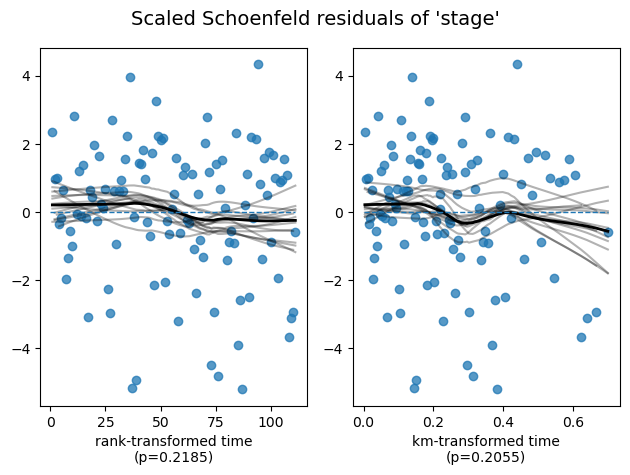

In [10]:
cph.check_assumptions(df, p_value_threshold=0.05, show_plots=True)


In [11]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(cph, df, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 258 total observations, 147 right-censored observations>
         test_name = proportional_hazard_test

---
          test_statistic    p  -log2(p)
age                 0.10 0.75      0.42
albumin             0.22 0.64      0.65
alk.phos            1.12 0.29      1.78
ascites             0.68 0.41      1.28
ast                 0.90 0.34      1.55
bili                1.51 0.22      2.19
chol                0.42 0.51      0.96
copper              0.08 0.78      0.36
edema               2.29 0.13      2.95
hepato              0.51 0.48      1.07
platelet            0.01 0.92      0.11
protime             3.69 0.05      4.19
sex                 0.06 0.81      0.30
spiders             1.20 0.27      1.87
stage               1.51 0.22      2.19
trig                0.46 0.50      1.01
trt                 0.24 0.63      0.68

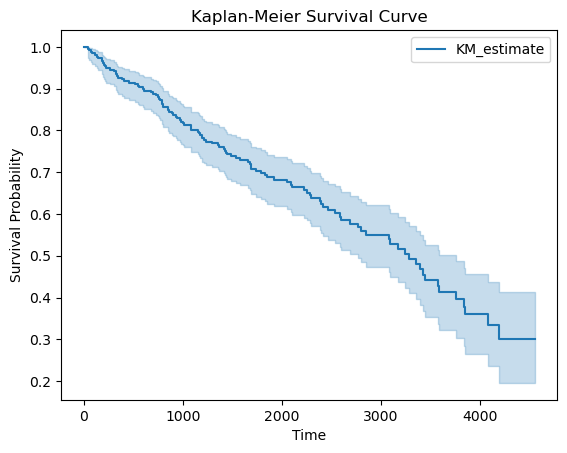

In [12]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the survival data
kmf.fit(df['time'], event_observed=df['status'])

# Plot the KM curve
kmf.plot()

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve')

# Show the plot
plt.show()


<AxesSubplot:xlabel='log(HR) (95% CI)'>

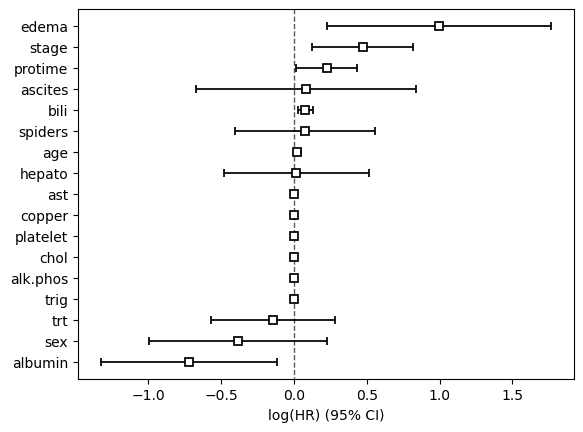

In [13]:
cph.plot()


# Gradient Boosting Survival Analysis

In [14]:
from sksurv.datasets import get_x_y
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with 'status' and 'time' columns
# Specify the positive label for survival analysis
y = df['status'] == 1

# Get the feature matrix X and target variable y
X, y = get_x_y(df, ['status', 'time'], pos_label=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create an instance of RandomSurvivalForest
gb = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)

# Fit the Random Survival Forest model on the training data
estimator = gb.fit(X_train, y_train)

# Predict survival probabilities for the test data
survival_probabilities = gb.predict_survival_function(X_test)



In [17]:
from sksurv.metrics import concordance_index_censored

# Compute the concordance index
prediction = estimator.predict(X_test)
result = concordance_index_censored(y_test['status'], y_test['time'], prediction)
concordance_index = result[0]

print(f"Concordance Index: {concordance_index}")

Concordance Index: 0.7809898242368177


# Random Survival Forest

In [22]:
from sksurv.datasets import get_x_y
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import train_test_split
# Assuming you have a DataFrame 'df' with 'status' and 'time' columns
# Specify the positive label for survival analysis
y = df['status'] == 1

# Get the feature matrix X and target variable y
X, y = get_x_y(df, ['status', 'time'], pos_label=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of RandomForestSurvivalAnalysis
rf = RandomSurvivalForest(n_estimators=100, random_state=42)

# Fit the RandomForestSurvivalAnalysis model on the training data
estimator_rf = rf.fit(X_train, y_train)

# Predict survival probabilities for the test data
survival_probabilities_rf = rf.predict_survival_function(X_test)


In [23]:
from sksurv.datasets import get_x_y
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import train_test_split
# Assuming you have a DataFrame 'df' with 'status' and 'time' columns
# Specify the positive label for survival analysis
y = df['status'] == 1

# Get the feature matrix X and target variable y
X, y = get_x_y(df, ['status', 'time'], pos_label=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of RandomForestSurvivalAnalysis
rf = RandomSurvivalForest(n_estimators=100, random_state=42)

# Fit the RandomForestSurvivalAnalysis model on the training data
estimator_rf = rf.fit(X_train, y_train)

# Predict survival probabilities for the test data
survival_probabilities_rf = rf.predict_survival_function(X_test)


In [24]:
#get the estimator score
estimator_rf.score(X_test, y_test)

0.8023121387283237

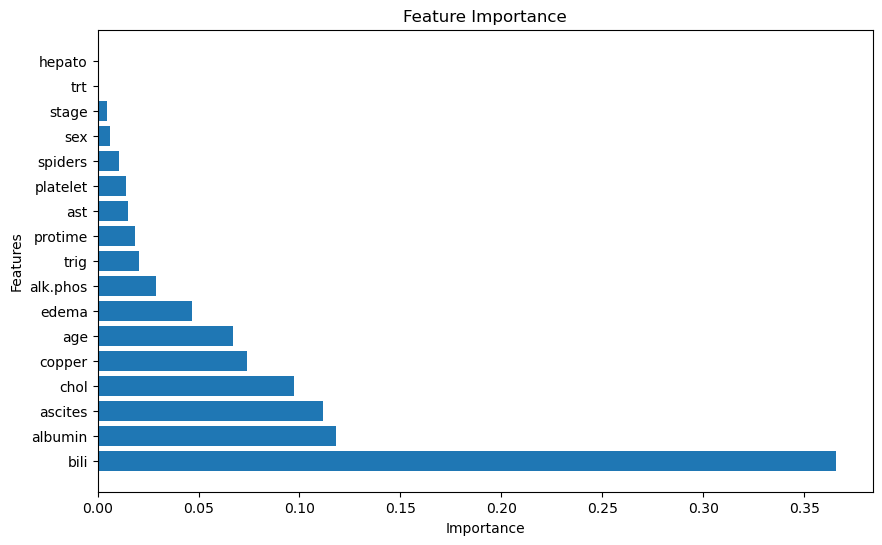

In [25]:
# Sort the feature importance in descending order
importance = gb.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importance)[::-1]

# Plot the feature importance horizontally
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_indices])
plt.yticks(range(len(importance)), feature_names[sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score
# Assuming you have already defined the RSF estimator as 'estimator' and the feature matrix as 'X' and the target variable as 'y'
scores = cross_val_score(estimator_rf, X, y, cv=5)
print("Cross-validated  Model Scores:", scores)


Cross-validated  Model Scores: [0.78701299 0.74844444 0.81257414 0.89007634 0.94623656]


# Random Survival Forest Inference on test dataset

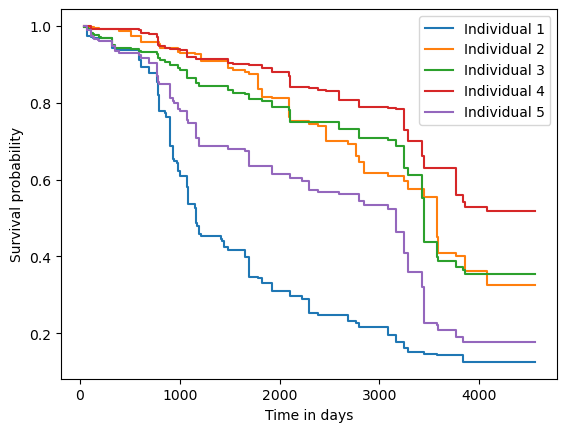

In [27]:
# Plot the survival probabilities for the first 5 individuals
for i in range(5):
    plt.step(survival_probabilities_rf[i].x, survival_probabilities_rf[i].y, where="post")

plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend(['Individual 1', 'Individual 2', 'Individual 3', 'Individual 4', 'Individual 5'])
plt.show()


In [32]:
from sksurv.metrics import concordance_index_censored

# Assuming cph_model, rsf_model, and gba_model are your trained models
models = {
    "CPH": cph,
    "RSF": es,
    "GBA": estimator_rf
}

for name, model in models.items():
    prediction = model.predict(X_test)
    result = concordance_index_censored(y_test['status'], y_test['time'], prediction)
    concordance_index = result[0]
    print(f"{name} Concordance Index: {concordance_index}")

NameError: name 'es' is not defined